In [66]:
import pandas as pd
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

In [55]:
df = pd.read_excel("water_data.xlsx")

In [56]:

numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Create a new DataFrame with only numeric columns
df_numeric = df[numeric_columns]


In [57]:
non_string_columns = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, str)).any()]
df_non_string = df[non_string_columns]


In [58]:
# Get the max and min values for each column
max_values = df_numeric.max()
min_values = df_numeric.min()

# Print results
print("Max values:\n", max_values)
print("\nMin values:\n", min_values)


Max values:
 Coleta           13.00
ano            2022.00
latitude     -24562.00
longitude    -53915.00
Dias              5.00
prec5a           23.20
prec4a           68.70
prec3a           43.90
prec2a           22.90
prec1a           61.20
prec1            32.50
prec2            48.00
prec3            57.60
Prec mês       1201.99
fluo            170.54
clor          91003.38
nitrito        3997.20
brom            175.92
nitrato       49620.42
sulfato        5729.87
fosfato        8008.25
N-NO2          1217.00
N-NO3         21357.95
S-SO4          1986.50
P-PO4          2611.84
gly              12.50
ampa              0.00
dtype: float64

Min values:
 Coleta             1.00
ano             2019.00
latitude     -257955.00
longitude    -550505.00
Dias               3.00
prec5a             0.00
prec4a             0.00
prec3a             0.00
prec2a             0.00
prec1a             0.00
prec1              0.00
prec2              0.00
prec3              0.00
Prec mês          12.20
f

In [59]:
df_cleaned = df.replace("NAN", np.nan).infer_objects(copy=False)

# Converter todas as colunas para numérico, se possível
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Calcular os valores máximos e mínimos
max_values = df_numeric.max()
min_values = df_numeric.min()

min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})


In [60]:
from IPython.display import display
pd.set_option('display.float_format', '{:.2f}'.format)

# display(min_max_df)

In [61]:
import pandas as pd
import numpy as np
from IPython.display import display

# Configuração para evitar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Criar um DataFrame para armazenar os resultados
result_data = []

# Lista de colunas a serem ignoradas (normalizando para minúsculas e removendo espaços)
# Ponto Amostral	Grupo	Coleta	mês	ano	latitude 	longitude 	inicio	final	Dias	prec5a	prec4a  
# 	prec3a 	prec2a	prec1a  	prec1 	prec2	prec3	prec4	prec5	Prec mês
ignore_columns = ["Ponto Amostral", "Grupo", "Coleta", "Latitude", "Longitude",
"Dias", "Prec5a", "Prec4a", "Prec3a", "Prec2a", "Prec1a", "Prec1", "Prec2", "Prec3", "Prec4", "Prec5", "Prec mês", "Mês", "Ano", "Inicio", "Final"]

ignore_columns = [col.strip().lower() for col in ignore_columns]

# Normalizar nomes das colunas no DataFrame
df_numeric.columns = [col.strip().lower() for col in df_numeric.columns]

# Percorrer cada coluna numérica para encontrar os valores mínimos e máximos
for col in df_numeric.columns:
    if col not in ignore_columns:  # Ignorar colunas especificadas
        min_value = df_numeric[col].min()
        max_value = df_numeric[col].max()

        # Encontrar as linhas que possuem esses valores
        min_rows = df[df_numeric[col] == min_value]
        max_rows = df[df_numeric[col] == max_value]

        if not min_rows.empty and not max_rows.empty:
            min_row = min_rows.iloc[0]
            max_row = max_rows.iloc[0]

            # Adicionar ao resultado
            result_data.append({
                "Variável": col,
                "Min": min_value,
                "Ponto Amostral (Min)": min_row["Ponto Amostral"],
                "Coleta (Min)": min_row["Coleta"],
                "Max": max_value,
                "Ponto Amostral (Max)": max_row["Ponto Amostral"],
                "Coleta (Max)": max_row["Coleta"]
            })

# Criar um DataFrame com os resultados
min_max_details_df = pd.DataFrame(result_data)

# Salvar em um arquivo Excel
output_path = "min_max_results.xlsx"
min_max_details_df.to_excel(output_path, index=False)

print(f"Arquivo salvo como: {output_path}")

display(min_max_details_df)  # Se estiver em um notebook


Arquivo salvo como: min_max_results.xlsx


,Variável,Min,Ponto Amostral (Min),Coleta (Min),Max,Ponto Amostral (Max),Coleta (Max)
0,temperatura,11.70,MBR-06,3,26.57,MBR-06,1
1,condu,0.00,MPY-07,1,0.93,MBR-16,10
2,ph,4.14,MPY-02,2,8.90,MPY-08,7
3,od,0.35,MBR-08,2,17.02,MBR-12,12
4,sol totais dis,0.00,MPY-07,1,0.60,MBR-16,10
5,turbidez,0.00,MBR-11,8,239.00,MBR-14,11
6,potencial oxi,45.00,MPY-03,2,424.00,MPY-02,12
7,nitrog,50.00,MPY-07,3,13097.47,MBR-16,6
8,fosf,12.50,MBR-06,1,3066.88,MBR-16,6
9,fluo,12.50,MPY-07,5,170.54,MBR-16,5


In [104]:
df = pd.read_excel("Base Qualidade da Água2.xlsx")

In [105]:
!pip install seaborn --upgrade --force-reinstall


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using 

error: uninstall-no-record-file

× Cannot uninstall matplotlib 3.10.1
╰─> The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.1


In [106]:
import seaborn as sns
print("Seaborn importado com sucesso!")


Seaborn importado com sucesso!


Percentual de valores ausentes por coluna:
Ponto Amostral                             100.00
latitude                                     0.00
longitude                                    0.00
inicio Cole                                  0.00
final cole                                   0.00
ano                                          0.00
Precipitação no MES                          0.00
Temperatura da Água (°C)                     0.00
Condutividade (mS cm-¹)                      7.05
pH                                           7.37
Oxigênio Dissolvido         (mg L-¹)         7.05
Sólidos Totais Dissolvidos       (g L-¹)     6.73
Turbidez (NTU)                               7.05
Potencial       Oxi-Redução (mV)             7.05
Nitrogênio Total (µg L-1)                    7.69
Fósforo Total (µg L-1)                       7.69
Fluoreto (µg L-1)                            0.00
Cloreto (µg L-1)                             0.00
Brometo (µg L-1)                             0.00
N-NO2 (

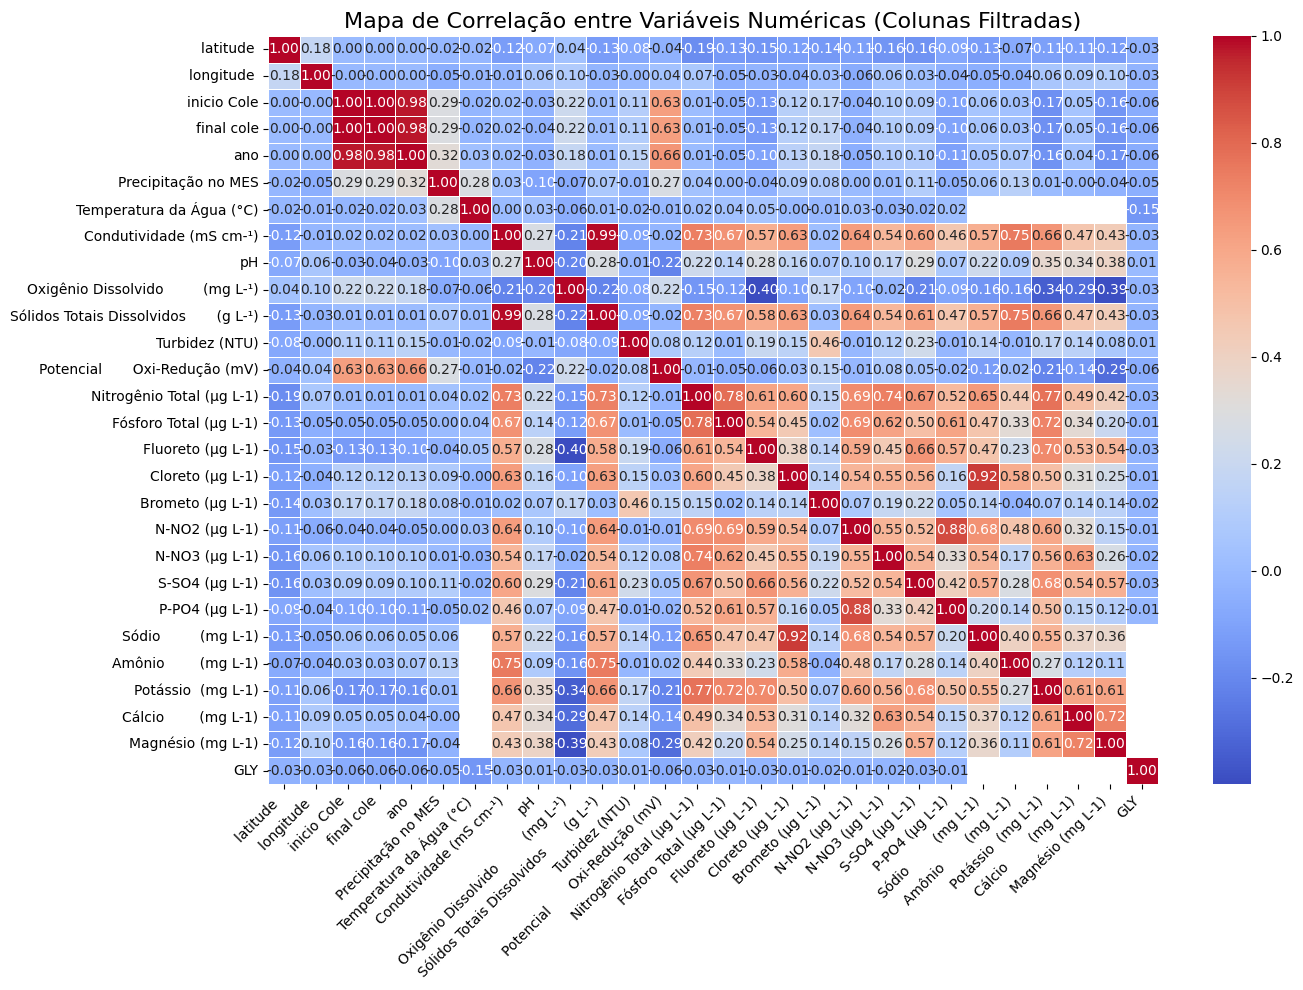

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
file_path = 'Base Qualidade da Água2.xlsx'  # Substitua pelo caminho correto
data = pd.read_excel(file_path)

# Converter todas as colunas para numérico
data = data.apply(pd.to_numeric, errors='coerce')

# Verificar a porcentagem de valores nulos por coluna
missing_data = data.isnull().mean() * 100
print("Percentual de valores ausentes por coluna:")
print(missing_data)

# Remover colunas com mais de 50% de valores nulos (ajuste o limite conforme necessário)
threshold = 50
columns_to_drop = missing_data[missing_data > threshold].index
print(f"\nColunas removidas (mais de {threshold}% de valores ausentes): {columns_to_drop.tolist()}")
data = data.drop(columns=columns_to_drop)

# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular a correlação
correlation_matrix = numeric_data.corr()

# Criar o gráfico de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Mapa de Correlação entre Variáveis Numéricas (Colunas Filtradas)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


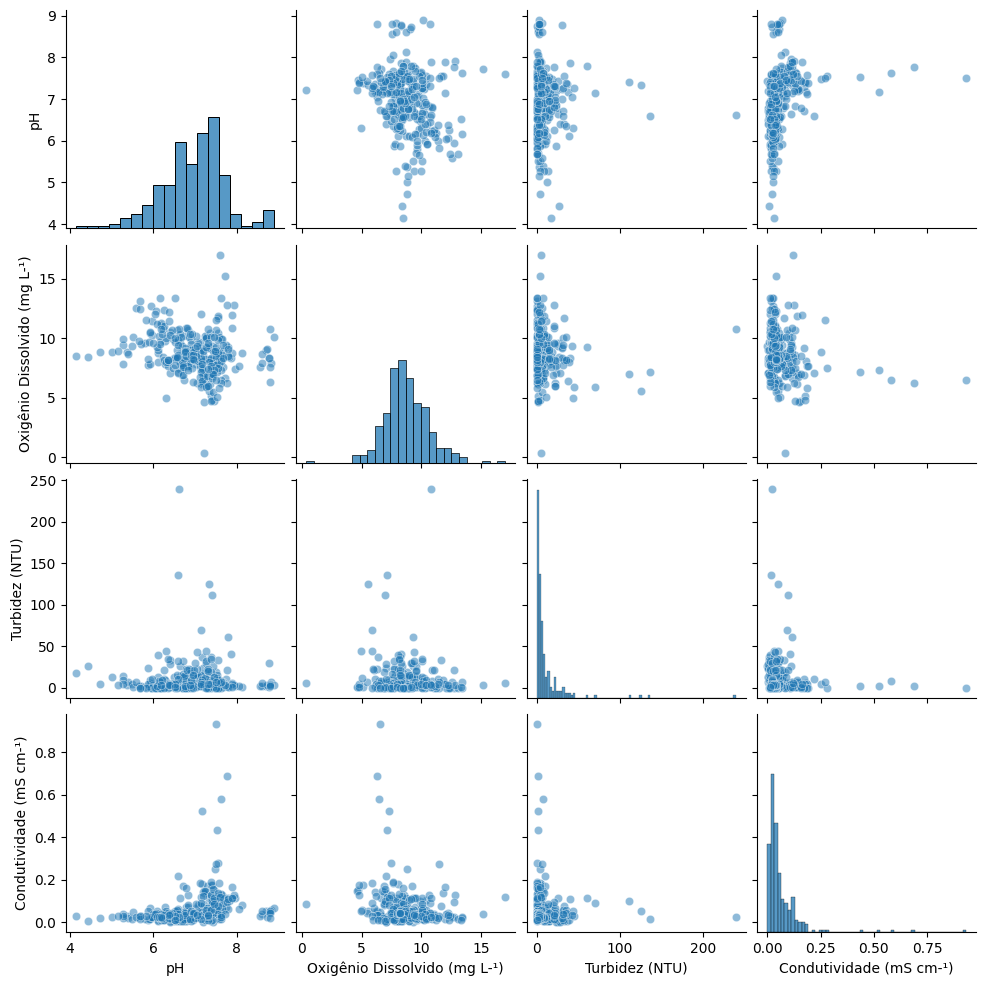

In [108]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
file_path = 'Base Qualidade da Água2.xlsx'  # Substitua pelo caminho correto
data = pd.read_excel(file_path)


# Padronizar nomes das colunas removendo espaços extras
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Selecionar as colunas desejadas
selected_columns = ["pH", "Oxigênio Dissolvido (mg L-¹)", "Turbidez (NTU)", "Condutividade (mS cm-¹)"]

# Converter para valores numéricos e remover NaNs
df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce').dropna()

# Criar o gráfico de dispersão com histogramas nas diagonais
sns.pairplot(df_selected, diag_kind='hist', plot_kws={'alpha': 0.5})

# Exibir o gráfico
plt.show()
